# Tarea 2

**Instrucciones**: Resuelve correctamente lo que se te pide

Realiza un programa que incluya cada una de las siguientes actividades.

## Operaciones con filtros

Dada la imagen en escala de grises que se indica en cada ejercicio, diseñar un algoritmo para cada tipo de filtro mostrando en el código fuente los cálculos implicados y la secuencia de barrido utilizada para mover la máscara en la imagen. Además, muestre la imagen original y las tres imágenes filtradas para cada uno de los casos. Interpretar resultados.


In [121]:
from PIL import Image, ImageOps
import requests
from io import BytesIO

response = requests.get(
    r'https://raw.githubusercontent.com/LeonelYLuego/University-Works/main/Procesamiento%20de%20Im%C3%A1genes/Im%C3%A1genes/80.png')
color_img = Image.open(BytesIO(response.content), mode='r')
gray_image = ImageOps.grayscale(color_img)
img = np.asarray(gray_image)


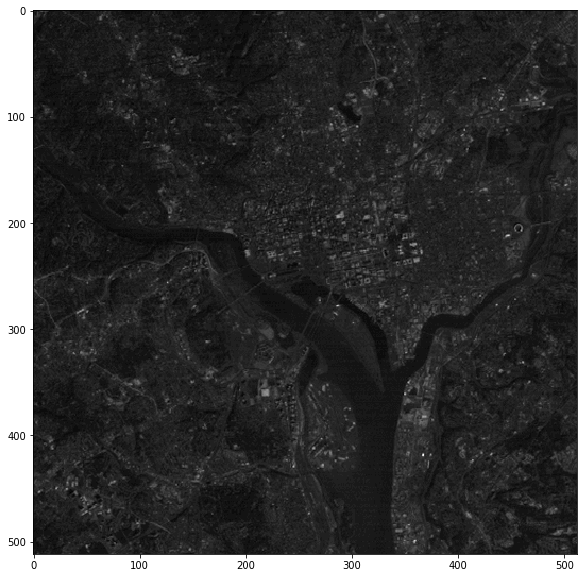

In [122]:
import matplotlib.pyplot as plt


def print_img(img):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img, interpolation='nearest', cmap='gray')


print_img(img)


### Filtro Espacial


In [123]:
import numpy as np
import cv2

origin = np.array([[1, 2, 3, 4, 5],
                   [7, 8, 7, 4, 1],
                   [6, 1, 9, 5, 2],
                   [4, 7, 1, 4, 7],
                   [5, 8, 3, 7, 0]], np.uint8)

mask = np.ones((5, 5))


def correlation(origin, mask, border='zeros', verbose=False):
    a = int((mask.shape[0] - 1) / 2)
    b = int((mask.shape[1] - 1) / 2)
    extended = np.zeros((origin.shape[0] + a * 2, origin.shape[1] + a * 2))
    M, N = extended.shape
    for y in range(0 + a, M - a):
        for x in range(0 + b, N - b):
            extended[y, x] = origin[y - a, x - b]
    if border == 'symmetric':
        extended = cv2.copyMakeBorder(origin, a, a, b, b, cv2.BORDER_REFLECT)
    if border == 'replicate':
        extended = cv2.copyMakeBorder(origin, a, a, b, b, cv2.BORDER_REPLICATE)
    if border == 'extension':
        extended = cv2.copyMakeBorder(origin, a, a, b, b, cv2.BORDER_WRAP)
    if (verbose):
        print(extended)
    result = np.zeros(extended.shape)
    for y in range(0 + a, M - a):
        for x in range(0 + b, N - b):
            sum = 0
            for s in range(-a, a + 1):
                for t in range(-b, b + 1):
                    sum += mask[s + a, t + b] * extended[y + s, x + t]
            result[y, x] = sum
    response = np.zeros(origin.shape)
    for y in range(0 + a, M - a):
        for x in range(0 + b, N - b):
            if (result[y, x] > 255):
                response[y - a, x - b] = 255
            elif (result[y, x] < 0):
                response[y - a, x - b] = 0
            else:
                response[y - a, x - b] = result[y, x]
    return response


print('Imagen extendida: ')
result = correlation(origin, mask, 'zeros', True)

print('\nResultado después del filtro espacial:')
print(result)


Imagen extendida: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 4. 5. 0. 0.]
 [0. 0. 7. 8. 7. 4. 1. 0. 0.]
 [0. 0. 6. 1. 9. 5. 2. 0. 0.]
 [0. 0. 4. 7. 1. 4. 7. 0. 0.]
 [0. 0. 5. 8. 3. 7. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Resultado después del filtro espacial:
[[ 44.  57.  65.  51.  40.]
 [ 56.  73.  88.  70.  52.]
 [ 72.  96. 111.  88.  62.]
 [ 66.  86.  96.  74.  50.]
 [ 44.  60.  69.  54.  38.]]


## Filtro Promedio

### Bordes rellenos con ceros


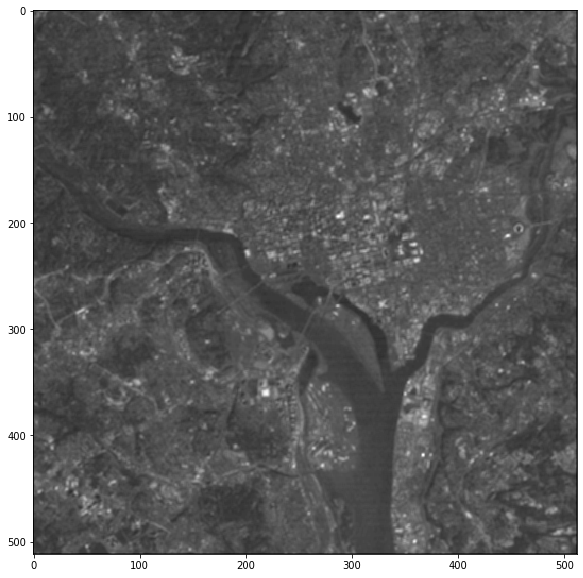

In [124]:
mask = np.array([[1/9, 1/9, 1/9],
                 [1/9, 1/9, 1/9],
                 [1/9, 1/9, 1/9]])

new_img = correlation(np.array(img, np.uint8), mask, 'zeros')
print_img(new_img)


### Bordes Replicados


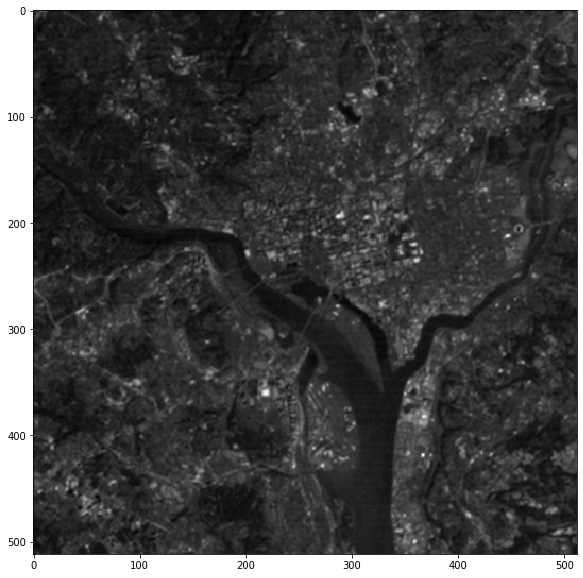

In [125]:
mask = np.array([[1/9, 1/9, 1/9],
                 [1/9, 1/9, 1/9],
                 [1/9, 1/9, 1/9]])

new_img = correlation(np.array(img, np.uint8), mask, 'replicate')
print_img(new_img)


### Bordes Extendidos Periódicamente


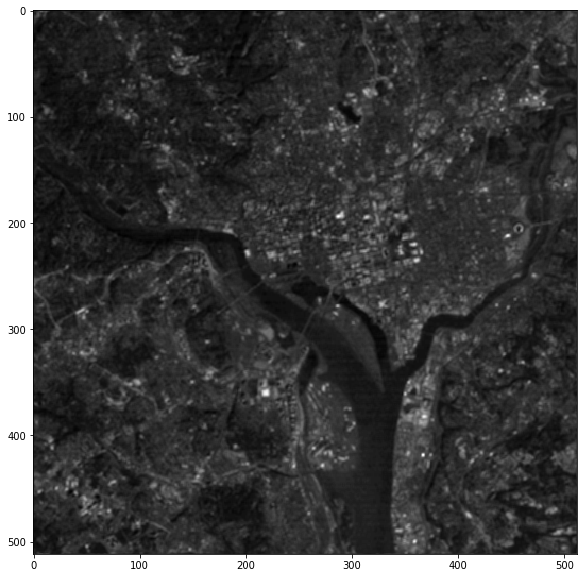

In [126]:
mask = np.array([[1/9, 1/9, 1/9],
                 [1/9, 1/9, 1/9],
                 [1/9, 1/9, 1/9]])

new_img = correlation(np.array(img, np.uint8), mask, 'extension')
print_img(new_img)


## Filtro gaussaino

De 3x3 ($\sigma$ = 0.5)


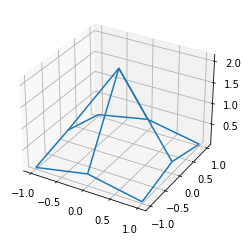

In [127]:
import math
N = 3
sigma = 0.5

a = int((N - 1) / 2)

mask = np.zeros((N, N))

for m in range(-a, a + 1):
    for n in range(-a, a + 1):
        K = 0
        for s in range(int(-(N-1)/2), int(((N - 1)/2) + 1)):
            sum = 0
            for t in range(int(-(N-1/2)), int(((N - 1)/2) + 1)):
                sum += math.exp((s ** 2 + t ** 2)/(2 * sigma ** 2))
            K += sum
        mask[m + a, n +
             a] = (math.exp(- ((m ** 2 + n ** 2) / (2 * sigma ** 2))))/K

x, y = np.arange(-a, a + 1, 1), np.arange(-a, a + 1, 1)
x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, mask)


### Bordes Replicados


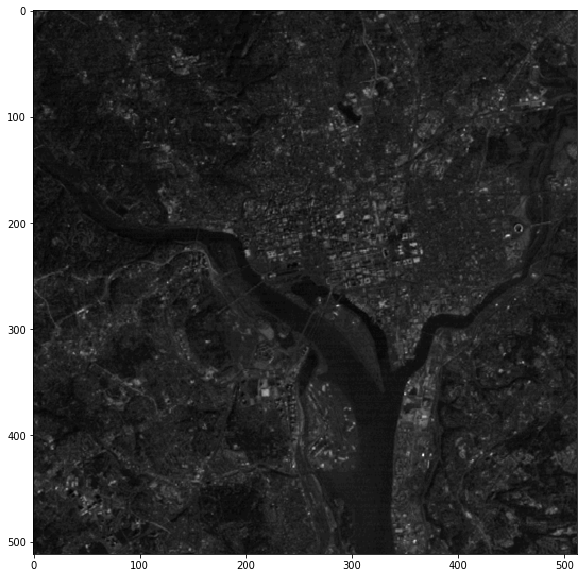

In [128]:
new_img = correlation(np.array(img, np.uint8), mask, 'replicate')
print_img(new_img)


### Bordes Extendidos Periódicamente

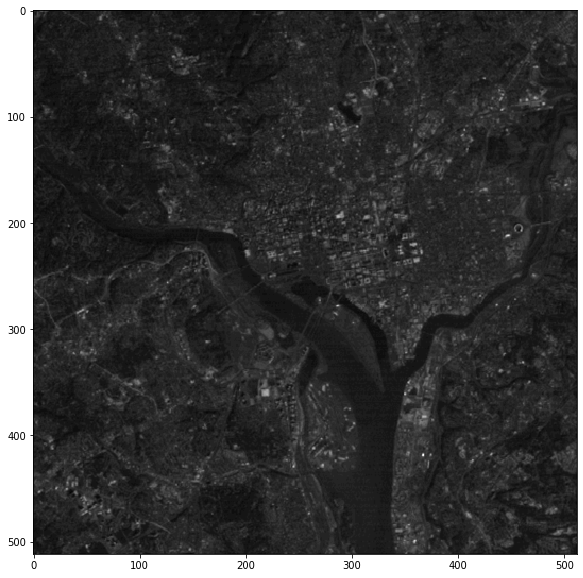

In [129]:
new_img = correlation(np.array(img, np.uint8), mask, 'extend')
print_img(new_img)


### Bordes Rellenados con Ceros

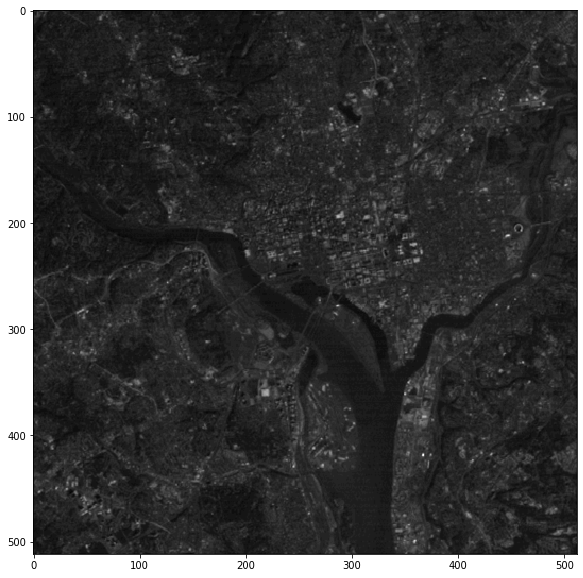

In [130]:
new_img = correlation(np.array(img, np.uint8), mask, 'zeros')
print_img(new_img)


## Filtros Laplacianos

$$
h(m,n) = \left[ \begin{array}{cc} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{array} \right]
$$

### Bordes Replicados


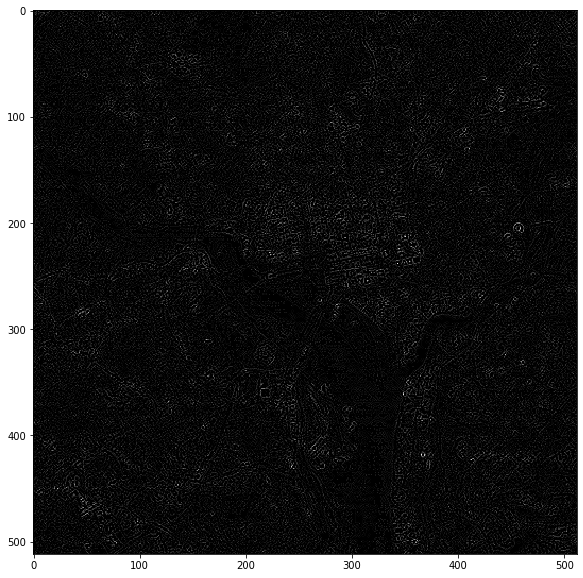

In [131]:
mask = np.array([[0, 1, 0],
                 [1, -4, 1],
                 [0, 1, 0]])

new_img = correlation(np.array(img, np.uint8), mask, 'replicate')
print_img(new_img)


### Bordes Extendidos Periódicamente

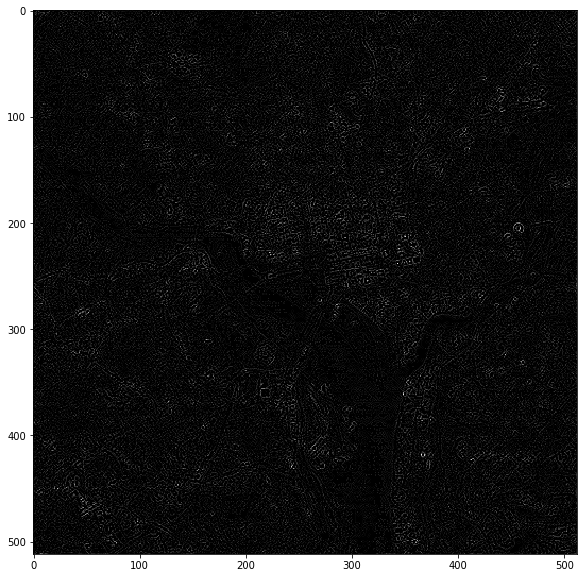

In [132]:
new_img = correlation(np.array(img, np.uint8), mask, 'extension')
print_img(new_img)

### Bordes Rellenados con Ceros

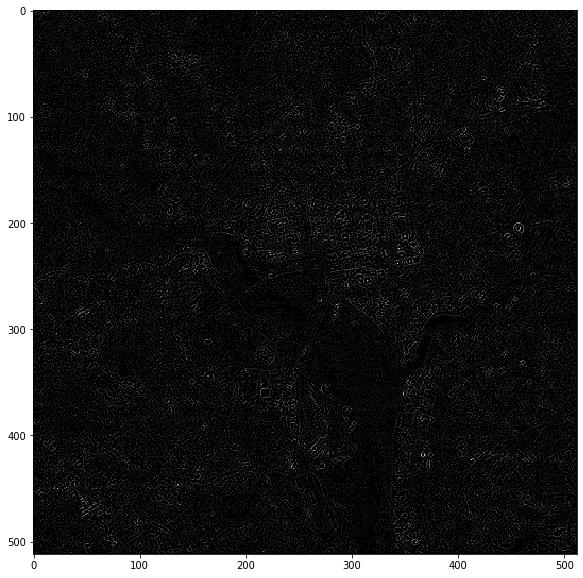

In [133]:
new_img = correlation(np.array(img, np.uint8), mask, 'zeros')
print_img(new_img)

$$
h(m,n) = \left[ \begin{array}{cc} 1 & 1 & 1 \\ 1 & -8 & 1 \\ 1 & 1 & 1 \end{array} \right]
$$

### Bordes Replicados

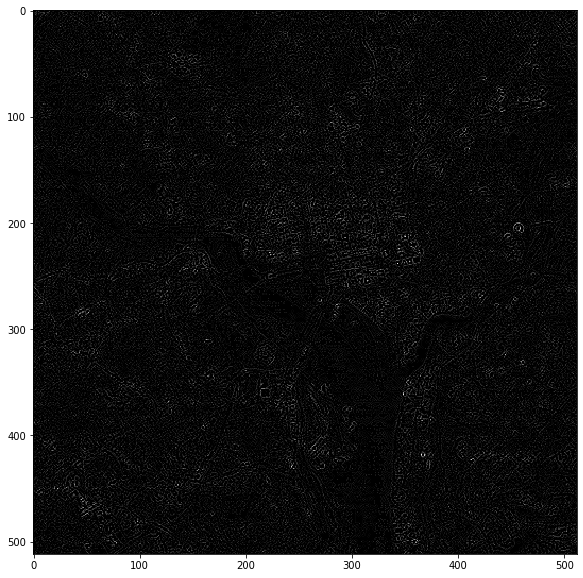

In [134]:
mask = np.array([[0, 1, 0],
                 [1, -4, 1],
                 [0, 1, 0]])

new_img = correlation(np.array(img, np.uint8), mask, 'replicate')
print_img(new_img)

### Bordes Extendidos Periódicamente

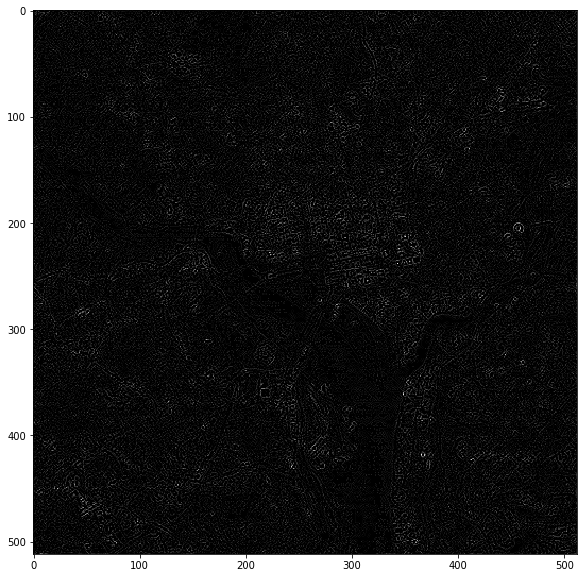

In [135]:
new_img = correlation(np.array(img, np.uint8), mask, 'extension')
print_img(new_img)

### Bordes Rellenados con Ceros

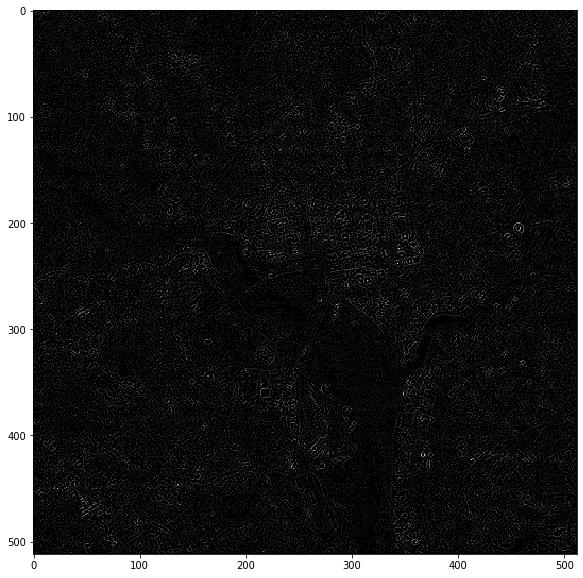

In [136]:
new_img = correlation(np.array(img, np.uint8), mask, 'zeros')
print_img(new_img)